In [45]:
import numpy as np
from numpy import pi,exp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [38]:
def f(t,y):
    dy = -100*y
    return dy

In [39]:
event_list=[]

def event1(t,y):
    return y-1
event2.terminal=False
event_list.append(event1)

def event2(t,y):
    return y-(100*t)**2
event2.terminal=False
event_list.append(event2)

In [44]:
x = solve_ivp(fun=f,t_span=(0.,1.),y0=np.array([10]),events=event_list,method='RK45',
              t_eval=np.linspace(0.,1.,100),max_step=0.1,rtol=0.001,atol=0.01)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2389711405.py, line 1)

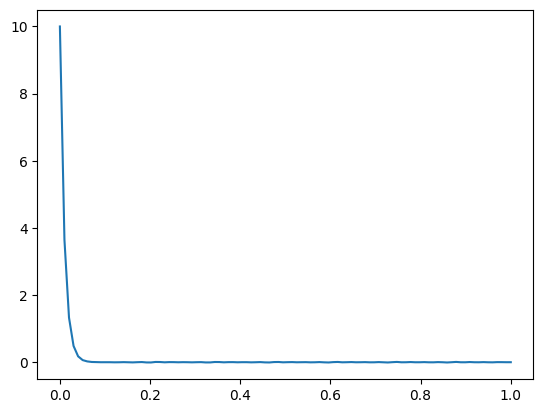

In [41]:
plt.plot(x.t,x.y[0])

In [31]:
x.t_events

[array([], dtype=float64), array([0.01496443])]

In [32]:
x.y_events

[array([], dtype=float64), array([[2.23934304]])]

In [43]:
if x.t[-1]==1.:
    print('good')

good


In [ ]:
#Defining gauss in cgs base units
cgsgauss = (u.g)**0.5*(u.s)**(-1)*(u.cm)**(-0.5)

#Universal Constants with units
c = (const.c).cgs
G = (const.G).cgs
sigma = (const.sigma_sb).cgs
k = (const.k_B).to(u.keV/u.K)



In [ ]:
#Fixed value functions
def I_func(M_NS,R_NS):
    I = 2*M_NS*(R_NS**2)/5
    return I

def mu_func(B,R_NS):
    mu = B*(R_NS**3)
    return mu

def K_func(mu,I,c):
    K = 2*(mu**2)/(3*(c**3)*I)
    return K



In [ ]:
#Iterable value functions
def R_m_func(Omega,delta,mu,rho_m,v_m):#Parameterized Magnetospheric Radius
    exponent = 1/(delta+6)
    numerator = (mu**2)*(v_m**(delta-2))
    denominator = 8*math.pi*(Omega**delta)*(rho_m)
    R_m = (numerator/denominator)**exponent
    return R_m

def R_L_func(Omega,c):#Light Cylinder Radius, Spindown transition when R_m=R_L
    R_L = c/Omega
    return R_L

def R_K_func(Omega,G,M_NS):#Keplerian orbit radius
    R_K = (G*M_NS/(Omega**2))**(1/3)
    return R_K

def H_number_func(R_mvalue,Omega,v_m):#Supposed to be Mach number (M)
    H_number = R_mvalue*Omega/v_m
    return H_number

def B_func(t,B0):
    B_min = min(B0/2,2e+13)
    B_15 = B0/(1E+15)
    t_yr = t/(3.154e+07)
    tau_ohm = 1e+06
    tau_Hall = 1e+04/B_15
    numerator = math.exp(-t_yr/tau_ohm)
    denominator = 1+(tau_ohm/tau_Hall)*(1 - math.exp(-t_yr/tau_ohm))
    B = B0*numerator/denominator
    return max(B,B_min)

In [ ]:

def I_fun(M,R):
    I = 2*M*(R**2)/5
    return I

def B_fun(t,B_0):
    B_min = min(B0/2,2e+13)
    B = B0*exp(-(t/3.154e+07)/1e+06)/(1+(1e+06/(tau_Hall = 1e+18/B_0))*(1 - exp(-(t/3.154e+07)/1e+06)))
    return max(B,B_min)

def mu_func(B,R_NS):
    mu = B*(R_NS**3)
    return mu

#Dipole Phase Spindown
def dipole_spindown_fun(t,Omega,B_0,M,R):
    dOmega = -(2*(mu_fun(t,B_0)**2))/(3*(c**3)*I_fun(M,R))*(Omega**3)
    return dOmega

In [ ]:
class Magnetar:
    def __init__(self,M_NS,R_NS,gamma,delta,decay_a,decay_alpha,B0,v_m,rho_m,t0,P0,t_obvs):
        self.M_NS_MSun = M_NS
        self.M_NS = (M_NS*const.M_sun).cgs
        self.R_NS = (R_NS*u.km).cgs
        self.I = I_func(self.M_NS,self.R_NS)
        self.gamma = gamma
        self.delta = delta
        self.decay_a = decay_a
        self.decay_alpha = decay_alpha
        self.v_m = v_m*(u.cm/u.s)
        self.rho_m = rho_m*(u.g/(u.cm**3))
        self.t_obvs = t_obvs
        self.obvs_type = '0'
        self.distance = 0*u.kpc
        self.M_dot = 0*(u.g/u.s)
        self.kT_eff = 0*u.keV

        self.P0 = P0
        self.B0 = B0
        self.t_arr = np.array([t0])
        self.Omega_arr = np.array([2*math.pi/(self.P0)])
        self.B_arr = np.array([self.B0])
        self.P_arr = np.array([self.P0])
        
        self.mu = mu_func(self.B_arr[-1]*cgsgauss,self.R_NS)
        self.K = K_func(self.mu,self.I,c)
        self.R_m = R_m_func(self.Omega_arr[-1],self.delta,self.mu.value,self.rho_m.value,self.v_m.value)
        self.R_L = R_L_func(self.Omega_arr[-1],c.value)
        self.R_K = R_K_func(self.Omega_arr[-1],G.value,self.M_NS.value)
        self.H_number = H_number_func(self.R_m,self.Omega_arr[-1],self.v_m.value)

    #Dipole Phase Spindown
    def DipoleSpindown(self,t,Omega):
        dOmega = -(self.K.value)*(Omega**3)
        return dOmega

    #Propeller Phase Spindown
    def PropSpindown(self,t,Omega):
        dOmega = -(self.mu.value**2)*(self.H_number)**(self.gamma-self.delta)/(8*self.I.value*(self.R_m)**3)
        return dOmega

    def Integratedipole(self):
        self.dOmega_arr = np.array([self.DipoleSpindown(self.t_arr[-1],self.Omega_arr[-1])])

        
        
        #Dipole Phase Integrator
        self.DipolePhaseInt = integrate.RK45(fun=self.DipoleSpindown,t0=self.t_arr[-1],y0=np.array([self.Omega_arr[-1]]),
                                             t_bound=3.16e+16,rtol=1e-05,atol=1e-26,first_step=1e+07,max_step=1e+12)
        #Dipole Phase Integration, stops once R_m>R_L
        while self.R_m>self.R_L and self.t_arr[-1]<self.t_obvs:
            self.DipolePhaseInt.step()
            self.t_arr = np.append(self.t_arr,[self.DipolePhaseInt.t])
            self.Omega_arr = np.append(self.Omega_arr,[self.DipolePhaseInt.y[0]])
            self.P_arr = np.append(self.P_arr,[(2*math.pi)/self.Omega_arr[-1]])
            self.dOmega_arr = np.append(self.dOmega_arr,[self.DipoleSpindown(self.t_arr[-1],self.Omega_arr[-1])])
            self.B_arr = np.append(self.B_arr,[B_func(self.t_arr[-1],self.B_arr[0],self.decay_a,self.decay_alpha)])

            self.mu = mu_func(self.B_arr[-1]*cgsgauss,self.R_NS)
            self.K = K_func(self.mu,self.I,c)
            self.R_m = R_m_func(self.Omega_arr[-1],self.delta,self.mu.value,self.rho_m.value,self.v_m.value)
            self.R_L = R_L_func(self.Omega_arr[-1],c.value)
            self.R_K = R_K_func(self.Omega_arr[-1],G.value,self.M_NS.value)
            self.H_number = H_number_func(self.R_m,self.Omega_arr[-1],self.v_m.value)
    
        if len(self.B_arr)>1:
            self.dOmega_arr = self.dOmega_arr[0:-1]
            self.t_arr = self.t_arr[0:-1]
            self.Omega_arr = self.Omega_arr[0:-1]
            self.P_arr = self.P_arr[0:-1]
            self.B_arr = self.B_arr[0:-1]
            self.mu = mu_func(self.B_arr[-1]*cgsgauss,self.R_NS)
            self.K = K_func(self.mu,self.I,c)
                                          
        #Dipole Phase Integrator
        self.DipolePhaseInt = integrate.RK45(fun=self.DipoleSpindown,t0=self.t_arr[-1],y0=np.array([self.Omega_arr[-1]]),
                                             t_bound=3.16e+16,rtol=1e-05,atol=1e-26,first_step=1e+07,max_step=1e+9)
        #Dipole Phase Integration, stops once 0.9999*R_m>R_L
        while 0.9999*self.R_m>self.R_L and self.t_arr[-1]<0.9999*self.t_obvs:
            self.DipolePhaseInt.step()
            self.t_arr = np.append(self.t_arr,[self.DipolePhaseInt.t])
            self.Omega_arr = np.append(self.Omega_arr,[self.DipolePhaseInt.y[0]])
            self.P_arr = np.append(self.P_arr,[(2*math.pi)/self.Omega_arr[-1]])
            self.dOmega_arr = np.append(self.dOmega_arr,[self.DipoleSpindown(self.t_arr[-1],self.Omega_arr[-1])])
            self.B_arr = np.append(self.B_arr,[B_func(self.t_arr[-1],self.B_arr[0],self.decay_a,self.decay_alpha)])

            self.mu = mu_func(self.B_arr[-1]*cgsgauss,self.R_NS)
            self.K = K_func(self.mu,self.I,c)
            self.R_m = R_m_func(self.Omega_arr[-1],self.delta,self.mu.value,self.rho_m.value,self.v_m.value)
            self.R_L = R_L_func(self.Omega_arr[-1],c.value)
            self.R_K = R_K_func(self.Omega_arr[-1],G.value,self.M_NS.value)
            self.H_number = H_number_func(self.R_m,self.Omega_arr[-1],self.v_m.value)
                                          
        if self.t_arr[-1]>0.9999*self.t_obvs:
            self.obvs_type = '1'
            self.distance = (self.v_m*self.t_obvs*u.s).to(u.kpc)
            
    def Integrateprop(self):
        #Propellor Phase Integrator
        self.PropPhaseInt = integrate.RK45(fun=self.PropSpindown,t0=self.t_arr[-1],y0=np.array([self.Omega_arr[-1]]),
                                           t_bound=3.16e+16,rtol=1e-05,atol=1e-26,first_step=1e+07,max_step=1e+12)
        #Dipole Phase Integration, stops once R_m>R_L
        while self.R_m>self.R_K and self.t_arr[-1]<self.t_obvs and self.Omega_arr[-1]>0:
            self.PropPhaseInt.step()
            self.t_arr = np.append(self.t_arr,[self.PropPhaseInt.t])
            self.Omega_arr = np.append(self.Omega_arr,[self.PropPhaseInt.y[0]])
            self.P_arr = np.append(self.P_arr,[(2*math.pi)/self.Omega_arr[-1]])
            self.dOmega_arr = np.append(self.dOmega_arr,[self.PropSpindown(self.t_arr[-1],self.Omega_arr[-1])])
            self.B_arr = np.append(self.B_arr,[B_func(self.t_arr[-1],self.B_arr[0],self.decay_a,self.decay_alpha)])

            self.mu = mu_func(self.B_arr[-1]*cgsgauss,self.R_NS)
            self.K = K_func(self.mu,self.I,c)
            self.R_m = R_m_func(self.Omega_arr[-1],self.delta,self.mu.value,self.rho_m.value,self.v_m.value)
            self.R_L = R_L_func(self.Omega_arr[-1],c.value)
            self.R_K = R_K_func(self.Omega_arr[-1],G.value,self.M_NS.value)
            self.H_number = H_number_func(self.R_m,self.Omega_arr[-1],self.v_m.value)

        if len(self.B_arr)>1:
            self.dOmega_arr = self.dOmega_arr[0:-1]
            self.t_arr = self.t_arr[0:-1]
            self.Omega_arr = self.Omega_arr[0:-1]
            self.P_arr = self.P_arr[0:-1]
            self.B_arr = self.B_arr[0:-1]
            self.mu = mu_func(self.B_arr[-1]*cgsgauss,self.R_NS)
            self.K = K_func(self.mu,self.I,c)